<a href="https://colab.research.google.com/github/JasmineD0401/SMA-LABS/blob/main/Social_network_graph_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset Link**

Dataset 1(used in this code) -->[ga_edgelist.csv](https://drive.google.com/file/d/17HYrtA8k4MpQ5WTqCCo5YlRIAmijvvyE/view?usp=sharing)

Extra dataset -->[us_edgelist.csv](https://drive.google.com/file/d/1Xiwk3IcHieyHAd40q5p3AOYtqqPuiWB2/view?usp=sharing)



**Reading the Dataset**


In [ ]:
# Reading our Edgelist
import pandas as pd
df = pd.read_csv("ga_edgelist.csv")

In [ ]:
df.head()

,from,to
0,lexi,sloan
1,lexi,karev
2,owen,yang
3,owen,altman
4,sloan,torres


**RANDOM GRAPH GENERATION(DATASET)**

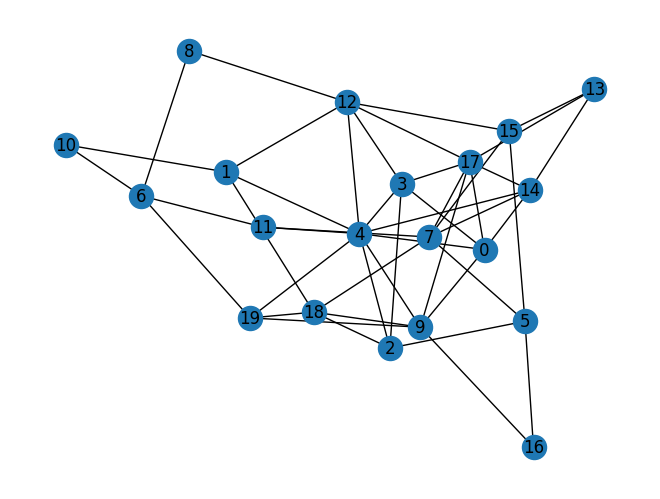

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def generate_social_network(num_nodes, avg_degree):
    """
    Generate a random social network graph.

    Parameters:
    - num_nodes: Number of nodes in the graph.
    - avg_degree: Average degree of nodes in the graph.

    Returns:
    - G: Random social network graph.
    """
    G = nx.fast_gnp_random_graph(num_nodes, avg_degree / num_nodes)
    return G

def plot_graph(G):
    """
    Plot the graph using NetworkX and Matplotlib.

    Parameters:
    - G: Graph to plot.
    """
    nx.draw(G, with_labels=True)
    plt.show()

# Generate a random social network graph with 20 nodes and average degree of 4
num_nodes = 20
avg_degree = 4
social_network = generate_social_network(num_nodes, avg_degree)

# Plot the generated graph
plot_graph(social_network)


**Visualizing the graph**

In [ ]:
import networkx as nx
greys = nx.from_pandas_edgelist(df,source="from",target="to")

In [ ]:
num_nodes = nx.number_of_nodes(greys)
num_edges = nx.number_of_edges(greys)

print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)

Number of nodes: 32
Number of edges: 34


In [ ]:
# Check For All Nodes/People/Objects
greys.nodes

NodeView(('lexi', 'sloan', 'karev', 'owen', 'yang', 'altman', 'torres', 'arizona', 'derek', 'grey', 'izzie', "o'malley", 'colin', 'preston', 'kepner', 'addison', 'nancy', 'olivia', 'mrs. seabury', 'chief', 'adele', 'ellis grey', 'thatch grey', 'susan grey', 'bailey', 'tucker', 'hank', 'denny', 'finn', 'steve', 'ben', 'avery'))

In [ ]:
# Check For All Edges /Connections
greys.edges

EdgeView([('lexi', 'sloan'), ('lexi', 'karev'), ('lexi', 'avery'), ('sloan', 'torres'), ('sloan', 'altman'), ('sloan', 'addison'), ('sloan', 'nancy'), ('karev', 'torres'), ('karev', 'izzie'), ('karev', 'kepner'), ('karev', 'addison'), ('karev', 'olivia'), ('karev', 'mrs. seabury'), ('owen', 'yang'), ('owen', 'altman'), ('yang', 'colin'), ('yang', 'preston'), ('torres', 'arizona'), ('torres', "o'malley"), ('derek', 'grey'), ('derek', 'addison'), ('grey', "o'malley"), ('grey', 'finn'), ('grey', 'steve'), ('izzie', "o'malley"), ('izzie', 'hank'), ('izzie', 'denny'), ("o'malley", 'olivia'), ('chief', 'adele'), ('chief', 'ellis grey'), ('ellis grey', 'thatch grey'), ('thatch grey', 'susan grey'), ('bailey', 'tucker'), ('bailey', 'ben')])

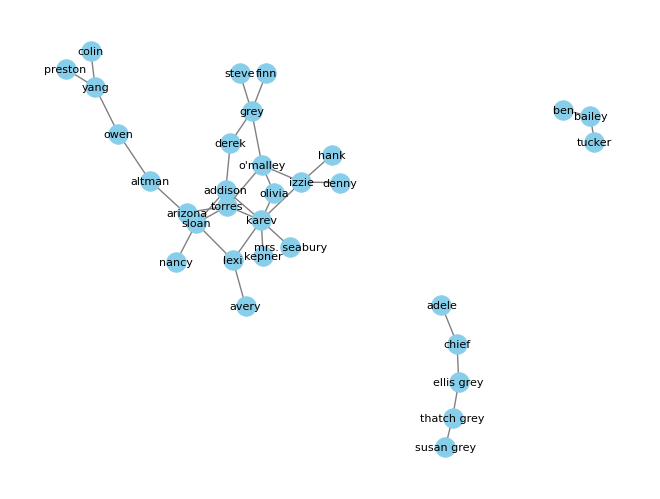

<Figure size 1200x1200 with 0 Axes>

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming 'greys' is your graph
pos = nx.spring_layout(greys)
nx.draw(greys, pos, with_labels=True, node_size=200, node_color='skyblue', edge_color='grey', linewidths=0.5, font_size=8)

# Set the figure size
plt.figure(figsize=(12, 12))

# Show the plot
plt.show()

In [ ]:
# General
nx.degree(greys)

DegreeView({'lexi': 3, 'sloan': 5, 'karev': 7, 'owen': 2, 'yang': 3, 'altman': 2, 'torres': 4, 'arizona': 1, 'derek': 2, 'grey': 4, 'izzie': 4, "o'malley": 4, 'colin': 1, 'preston': 1, 'kepner': 1, 'addison': 3, 'nancy': 1, 'olivia': 2, 'mrs. seabury': 1, 'chief': 2, 'adele': 1, 'ellis grey': 2, 'thatch grey': 2, 'susan grey': 1, 'bailey': 2, 'tucker': 1, 'hank': 1, 'denny': 1, 'finn': 1, 'steve': 1, 'ben': 1, 'avery': 1})

In [ ]:
# How many people are connected to Dr Grey
nx.degree(greys,"grey")

4

In [ ]:
neighbors_of_grey = list(greys.neighbors("grey"))
neighbors_of_grey

['derek', "o'malley", 'finn', 'steve']

In [ ]:
all_neighbors_of_grey = nx.all_neighbors(greys, "grey")
all_neighbors_of_grey_list = list(all_neighbors_of_grey)
all_neighbors_of_grey_list

NameError: name 'nx' is not defined

**Creating a subgraph**

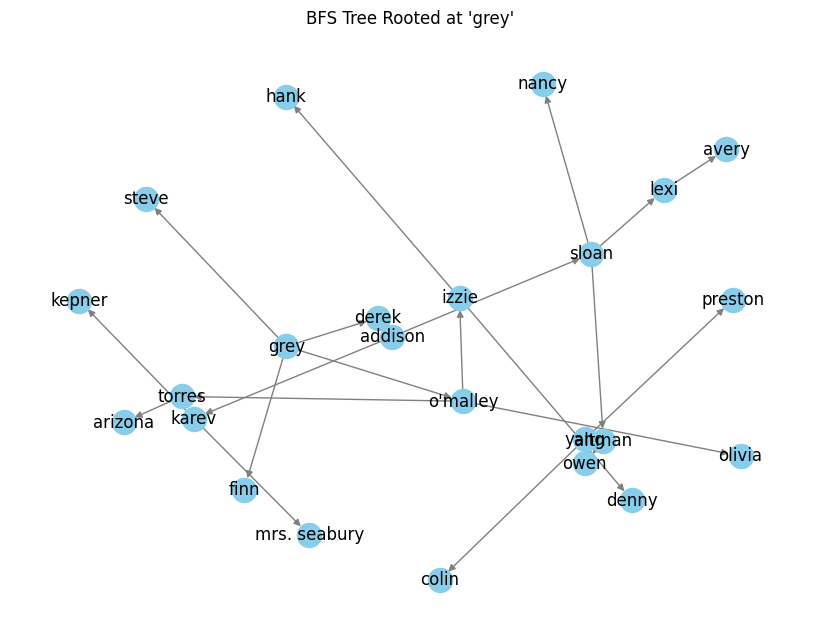

In [ ]:
new_group = nx.bfs_tree(greys, "grey")
import networkx as nx
import matplotlib.pyplot as plt

# Assuming new_group is the graph created by nx.bfs_tree()
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Draw the graph
pos = nx.spring_layout(new_group)  # Define the layout
nx.draw(new_group, pos, with_labels=True, node_size=300, node_color="skyblue", edge_color="gray")

# Add a title
plt.title("BFS Tree Rooted at 'grey'")

# Display the graph
plt.show()


In [ ]:
connected_component = list(nx.node_connected_component(greys, "grey"))
connected_component

['finn',
 'arizona',
 'lexi',
 'kepner',
 "o'malley",
 'olivia',
 'preston',
 'izzie',
 'altman',
 'hank',
 'denny',
 'colin',
 'addison',
 'avery',
 'mrs. seabury',
 'sloan',
 'owen',
 'torres',
 'derek',
 'nancy',
 'steve',
 'grey',
 'karev',
 'yang']

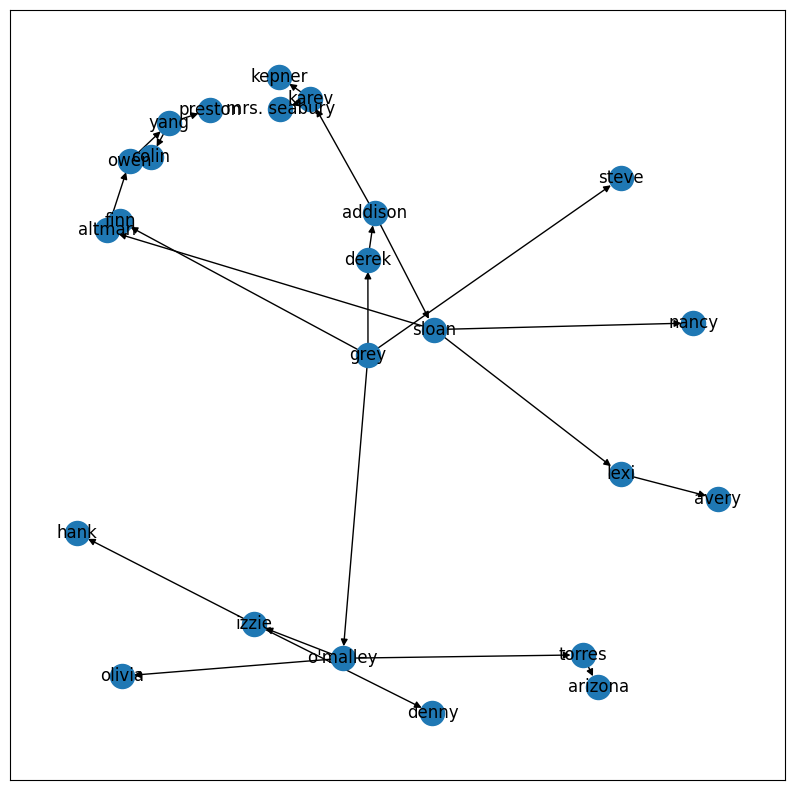

24

In [ ]:
plt.figure(figsize=(10,10))
nx.draw_networkx(new_group)
plt.show()
# Number of People in this new node
len(new_group.nodes)

**Degree Centrality**

In [ ]:
nx.degree_centrality(greys)

{'lexi': 0.0967741935483871,
 'sloan': 0.16129032258064516,
 'karev': 0.22580645161290322,
 'owen': 0.06451612903225806,
 'yang': 0.0967741935483871,
 'altman': 0.06451612903225806,
 'torres': 0.12903225806451613,
 'arizona': 0.03225806451612903,
 'derek': 0.06451612903225806,
 'grey': 0.12903225806451613,
 'izzie': 0.12903225806451613,
 "o'malley": 0.12903225806451613,
 'colin': 0.03225806451612903,
 'preston': 0.03225806451612903,
 'kepner': 0.03225806451612903,
 'addison': 0.0967741935483871,
 'nancy': 0.03225806451612903,
 'olivia': 0.06451612903225806,
 'mrs. seabury': 0.03225806451612903,
 'chief': 0.06451612903225806,
 'adele': 0.03225806451612903,
 'ellis grey': 0.06451612903225806,
 'thatch grey': 0.06451612903225806,
 'susan grey': 0.03225806451612903,
 'bailey': 0.06451612903225806,
 'tucker': 0.03225806451612903,
 'hank': 0.03225806451612903,
 'denny': 0.03225806451612903,
 'finn': 0.03225806451612903,
 'steve': 0.03225806451612903,
 'ben': 0.03225806451612903,
 'avery': 0.

**Most influential Node**

In [ ]:
# Sort them
most_influential = nx.degree_centrality(greys)
most_influential

{'lexi': 0.0967741935483871,
 'sloan': 0.16129032258064516,
 'karev': 0.22580645161290322,
 'owen': 0.06451612903225806,
 'yang': 0.0967741935483871,
 'altman': 0.06451612903225806,
 'torres': 0.12903225806451613,
 'arizona': 0.03225806451612903,
 'derek': 0.06451612903225806,
 'grey': 0.12903225806451613,
 'izzie': 0.12903225806451613,
 "o'malley": 0.12903225806451613,
 'colin': 0.03225806451612903,
 'preston': 0.03225806451612903,
 'kepner': 0.03225806451612903,
 'addison': 0.0967741935483871,
 'nancy': 0.03225806451612903,
 'olivia': 0.06451612903225806,
 'mrs. seabury': 0.03225806451612903,
 'chief': 0.06451612903225806,
 'adele': 0.03225806451612903,
 'ellis grey': 0.06451612903225806,
 'thatch grey': 0.06451612903225806,
 'susan grey': 0.03225806451612903,
 'bailey': 0.06451612903225806,
 'tucker': 0.03225806451612903,
 'hank': 0.03225806451612903,
 'denny': 0.03225806451612903,
 'finn': 0.03225806451612903,
 'steve': 0.03225806451612903,
 'ben': 0.03225806451612903,
 'avery': 0.

In [ ]:
for w in sorted(most_influential, key=most_influential.get, reverse=True):
    print(w, most_influential[w])

karev 0.22580645161290322
sloan 0.16129032258064516
torres 0.12903225806451613
grey 0.12903225806451613
izzie 0.12903225806451613
o'malley 0.12903225806451613
lexi 0.0967741935483871
yang 0.0967741935483871
addison 0.0967741935483871
owen 0.06451612903225806
altman 0.06451612903225806
derek 0.06451612903225806
olivia 0.06451612903225806
chief 0.06451612903225806
ellis grey 0.06451612903225806
thatch grey 0.06451612903225806
bailey 0.06451612903225806
arizona 0.03225806451612903
colin 0.03225806451612903
preston 0.03225806451612903
kepner 0.03225806451612903
nancy 0.03225806451612903
mrs. seabury 0.03225806451612903
adele 0.03225806451612903
susan grey 0.03225806451612903
tucker 0.03225806451612903
hank 0.03225806451612903
denny 0.03225806451612903
finn 0.03225806451612903
steve 0.03225806451612903
ben 0.03225806451612903
avery 0.03225806451612903


**Closeness Centrality**

In [ ]:
import networkx as nx

# Assuming greys is your graph
closeness_centralities = nx.closeness_centrality(greys)

# Print or do further processing with the centrality scores
for node, closeness_centrality in closeness_centralities.items():
    print(f"Node {node}: Closeness Centrality = {closeness_centrality}")

Node lexi: Closeness Centrality = 0.26253101736972706
Node sloan: Closeness Centrality = 0.2892290869327502
Node karev: Closeness Centrality = 0.2892290869327502
Node owen: Closeness Centrality = 0.19173613628126135
Node yang: Closeness Centrality = 0.1594814591498342
Node altman: Closeness Centrality = 0.2337604949182501
Node torres: Closeness Centrality = 0.29937747594793435
Node arizona: Closeness Centrality = 0.21600653327888933
Node derek: Closeness Centrality = 0.2337604949182501
Node grey: Closeness Centrality = 0.2216170925848345
Node izzie: Closeness Centrality = 0.24731182795698925
Node o'malley: Closeness Centrality = 0.2708653353814644
Node colin: Closeness Centrality = 0.13228307076769194
Node preston: Closeness Centrality = 0.13228307076769194
Node kepner: Closeness Centrality = 0.21067303863002787
Node addison: Closeness Centrality = 0.2892290869327502
Node nancy: Closeness Centrality = 0.21067303863002787
Node olivia: Closeness Centrality = 0.2337604949182501
Node mrs. 

In [ ]:
import networkx as nx

# Assuming greys is your graph
closeness_centralities = nx.closeness_centrality(greys)

# Sort nodes based on their closeness centrality scores
sorted_nodes = sorted(closeness_centralities, key=closeness_centralities.get, reverse=True)

# Print the sorted nodes along with their closeness centrality scores
for node in sorted_nodes:
    closeness_centrality = closeness_centralities[node]
    print(f"Node {node}: Closeness Centrality = {closeness_centrality}")


Node torres: Closeness Centrality = 0.29937747594793435
Node sloan: Closeness Centrality = 0.2892290869327502
Node karev: Closeness Centrality = 0.2892290869327502
Node addison: Closeness Centrality = 0.2892290869327502
Node o'malley: Closeness Centrality = 0.2708653353814644
Node lexi: Closeness Centrality = 0.26253101736972706
Node izzie: Closeness Centrality = 0.24731182795698925
Node altman: Closeness Centrality = 0.2337604949182501
Node derek: Closeness Centrality = 0.2337604949182501
Node olivia: Closeness Centrality = 0.2337604949182501
Node grey: Closeness Centrality = 0.2216170925848345
Node arizona: Closeness Centrality = 0.21600653327888933
Node kepner: Closeness Centrality = 0.21067303863002787
Node nancy: Closeness Centrality = 0.21067303863002787
Node mrs. seabury: Closeness Centrality = 0.21067303863002787
Node avery: Closeness Centrality = 0.19614386355209493
Node owen: Closeness Centrality = 0.19173613628126135
Node hank: Closeness Centrality = 0.18752215526409075
Node

**Betweenness Centrality**

In [ ]:
nx.betweenness_centrality(greys)

{'lexi': 0.07741935483870968,
 'sloan': 0.248100358422939,
 'karev': 0.2048745519713262,
 'owen': 0.12903225806451613,
 'yang': 0.09247311827956989,
 'altman': 0.16344086021505377,
 'torres': 0.14440860215053763,
 'arizona': 0.0,
 'derek': 0.038602150537634404,
 'grey': 0.10078853046594982,
 'izzie': 0.10311827956989246,
 "o'malley": 0.11702508960573477,
 'colin': 0.0,
 'preston': 0.0,
 'kepner': 0.0,
 'addison': 0.09480286738351255,
 'nancy': 0.0,
 'olivia': 0.01064516129032258,
 'mrs. seabury': 0.0,
 'chief': 0.0064516129032258064,
 'adele': 0.0,
 'ellis grey': 0.008602150537634409,
 'thatch grey': 0.0064516129032258064,
 'susan grey': 0.0,
 'bailey': 0.002150537634408602,
 'tucker': 0.0,
 'hank': 0.0,
 'denny': 0.0,
 'finn': 0.0,
 'steve': 0.0,
 'ben': 0.0,
 'avery': 0.0}